In [1]:
using DataFrames
using Gadfly

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/tamasnagy/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/tamasnagy/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/tamasnagy/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/tamasnagy/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
df = readtable("data/bigiron_facs_binning_snr_d56c7a8_clean.csv")
# df[df[:technique] .== "signal", :score] = log2(df[df[:technique] .== "signal", :score])
# deleterows!(df, find(df[:technique] .== "snr"))
head(df)

,technique,score,num_genes,coverage,representation,moi,σ,bin_info,bottleneck_representation,seq_depth,run_idx,crisprtype
1,snr,1.7437091225551875,500,5,10,0.25,1.0,0.5,10,10,1,CRISPRi
2,snr,1.8865564086006428,500,5,10,0.25,1.0,0.5,10,10,2,CRISPRi
3,snr,2.2687043808713527,500,5,10,0.25,1.0,0.5,10,10,3,CRISPRi
4,snr,1.6754887740932651,500,5,10,0.25,1.0,0.5,10,10,4,CRISPRi
5,snr,2.237104952860403,500,5,10,0.25,1.0,0.5,10,10,5,CRISPRi
6,snr,2.9668067836514336,500,5,10,0.25,1.0,0.5,10,10,6,CRISPRi


In [3]:
df[!isfinite(df[:score]), :score] = 0.0
df[:rep_lvl] = :none
for (rep_amt, noise_lvl) in zip([(10, 10, 10, 1.0), (100, 100, 100, 1.0), (1000, 1000, 1000, 0.5)], [:low, :med, :high])
    selection = [
        (:representation, rep_amt[1]),
        (:bottleneck_representation, rep_amt[2]), 
        (:seq_depth, rep_amt[3]), 
        (:σ, rep_amt[4])
    ]
    df[vec(all(hcat([(df[item[1]] .== item[2]) for item in selection]...), 2)), :rep_lvl] = noise_lvl
end
delete!(df, [:representation, :seq_depth, :bottleneck_representation, :σ])
subdfs = []
for subdf in groupby(df, [:technique, :rep_lvl, :crisprtype])
    subdf[:score] = subdf[:score] ./ maximum(subdf[:score])
    push!(subdfs, subdf)
end
df = vcat(subdfs...)
head(df)

,technique,score,num_genes,coverage,moi,bin_info,run_idx,crisprtype,rep_lvl
1,noise,0.08648508612915688,500,5,0.25,0.5,1,CRISPRKO,high
2,noise,0.08207099495593766,500,5,0.25,0.5,2,CRISPRKO,high
3,noise,0.09211835724887645,500,5,0.25,0.5,3,CRISPRKO,high
4,noise,0.09430858250583832,500,5,0.25,0.5,4,CRISPRKO,high
5,noise,0.07918669012050547,500,5,0.25,0.5,5,CRISPRKO,high
6,noise,0.09005507195498429,500,5,0.25,0.5,6,CRISPRKO,high


In [4]:
grouped_info = by(df, [:technique, :rep_lvl, :bin_info, :crisprtype]) do grouped_df
    grouped_df = grouped_df[1:25, :]
    n = size(grouped_df, 1)
    mean_score = mean(grouped_df[:score])
    std_score = std(grouped_df[:score])
    conf_int = 2.58 * std_score./sqrt(n)
    DataFrame(
        std_score = std_score,
        mean_score = mean_score,
        score_max = mean_score + conf_int,
        score_min = mean_score - conf_int,
        n = n
    )
end
deleterows!(grouped_info, collect(1:size(grouped_info, 1))[grouped_info[:rep_lvl] .== :low])
head(grouped_info)

,technique,rep_lvl,bin_info,crisprtype,std_score,mean_score,score_max,score_min,n
1,noise,high,0.025,CRISPRKO,0.11887850887142379,0.47103119651833225,0.5323725070959869,0.40968988594067757,25
2,noise,high,0.025,CRISPRi,0.13924719730605942,0.5418465194690395,0.6136980732789662,0.4699949656591128,25
3,noise,high,0.041379310344827586,CRISPRKO,0.0302168423140523,0.3129053783429664,0.32849726897701736,0.2973134877089154,25
4,noise,high,0.041379310344827586,CRISPRi,0.08960722137459044,0.3196067056665062,0.36584403189579484,0.2733693794372175,25
5,noise,high,0.05775862068965517,CRISPRKO,0.01821433355619863,0.25889667804416694,0.26829527415916543,0.24949808192916845,25
6,noise,high,0.05775862068965517,CRISPRi,0.0347040534411537,0.25601343397369,0.2739207255493253,0.23810614239805467,25


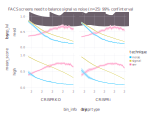

In [5]:
lmhlt(x, y) = x == :low && y != :low || x == :med && y == :high
sort!(grouped_info, lt=lmhlt)

p = plot(grouped_info, x=:bin_info, y=:mean_score, ymax=:score_max, ymin=:score_min, 
color=:technique, xgroup=:crisprtype, ygroup=:rep_lvl,
Geom.subplot_grid(Geom.line, Geom.ribbon, Coord.cartesian(xmax=-1)), Scale.x_log2,
Guide.title("FACS screens need to balance signal vs noise (n=25) 99% conf interval"))

draw(SVG("plots/signal_noise_tradeoff.svg", 15cm, 12cm), p)
p.theme = Theme(background_color=colorant"white")
draw(SVG(15cm, 12cm), p)